In [35]:
import os
import pickle
import logging 
from openmmtools.multistate import MultiStateReporter
import tqdm

# Set up logger
_logger = logging.getLogger()
_logger.setLevel(logging.INFO)

from matplotlib import pyplot as plt
import matplotlib.transforms as transforms


## THR->ALA in solvent

### Load nc file

In [50]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/10/34/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'solvent'
endstate = 0
aa = 'THR'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [51]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [15]:
states = range(11)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [52]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 10/10 [01:39<00:00,  9.93s/it]


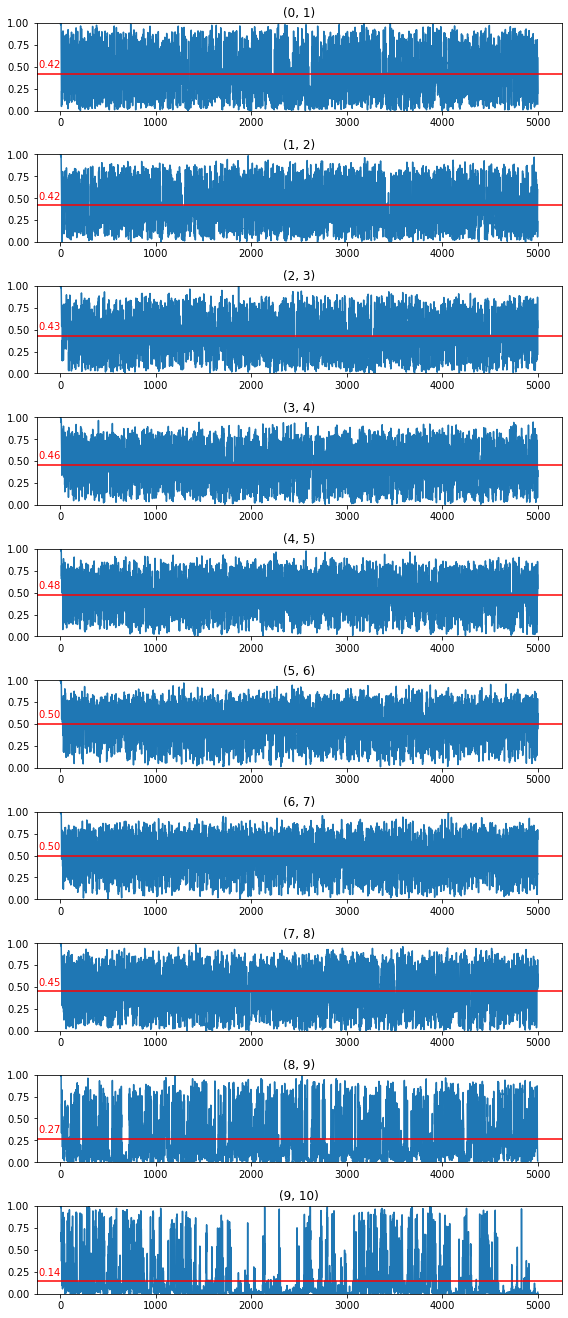

In [53]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 0 across all iterations and plot

In [57]:
states = range(11)
states_0 = []
for first, second in zip([0]*11, states):
    states_0.append((first, second))

In [60]:
acceptance_rates_0 = []
for pair in tqdm.tqdm(states_0):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_0.append(acceptance_rates)

100%|██████████| 11/11 [01:49<00:00,  9.94s/it]


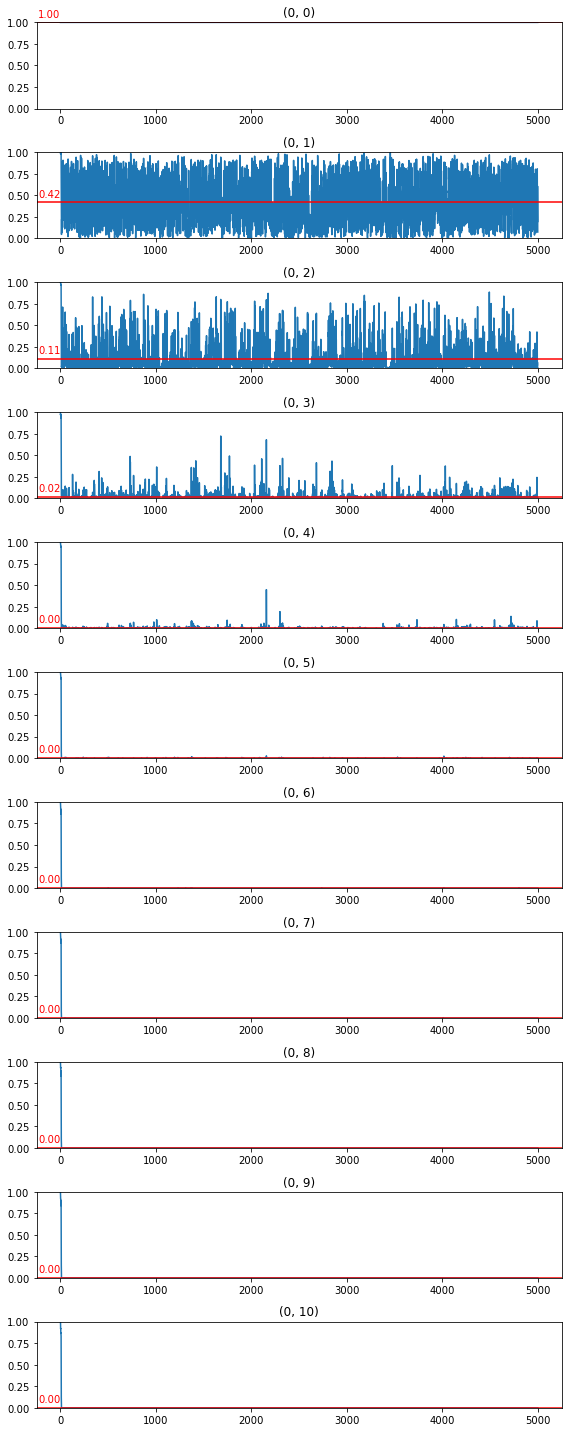

In [61]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_0, acceptance_rates_0)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 10 across all iterations and plot

In [63]:
states = range(11)
states_10 = []
for first, second in zip([10]*11, states):
    states_10.append((first, second))

In [64]:
states_10

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (10, 10)]

In [65]:
acceptance_rates_10 = []
for pair in tqdm.tqdm(states_10):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, 5001):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_10.append(acceptance_rates)

100%|██████████| 11/11 [01:49<00:00,  9.97s/it]


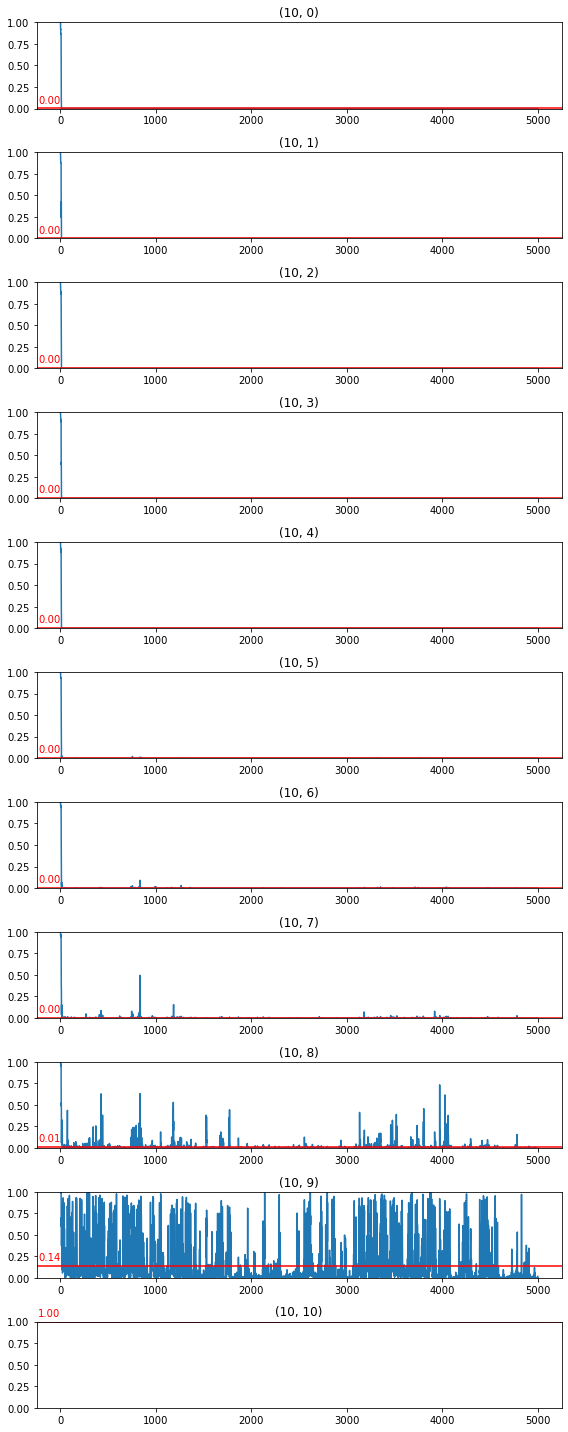

In [66]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_10, acceptance_rates_10)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

## 8mer SER->ALA in vacuum

### Load nc file

In [67]:
out_dir = "/data/chodera/zhangi/perses_benchmark/neq/10/35/"
i = os.path.basename(os.path.dirname(out_dir))
phase = 'vacuum'
endstate = 0
aa = 'SER'.lower()
length = '5ns'
# with open(os.path.join(out_dir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)


In [68]:
reporter = MultiStateReporter(os.path.join(out_dir, f"{i}_{phase}_{aa}_{length}.nc"), 'r')


### Compute acceptance rates for neighboring pairs of states across all iterations and plot

In [69]:
states = range(11)
state_neighbors = []
for first, second in zip(states, states[1:]):
    state_neighbors.append((first, second))

In [72]:
last_iter = reporter.read_last_iteration()

In [73]:
acceptance_rates_all = []
for pair in tqdm.tqdm(state_neighbors):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, last_iter):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_all.append(acceptance_rates)

100%|██████████| 10/10 [01:32<00:00,  9.23s/it]


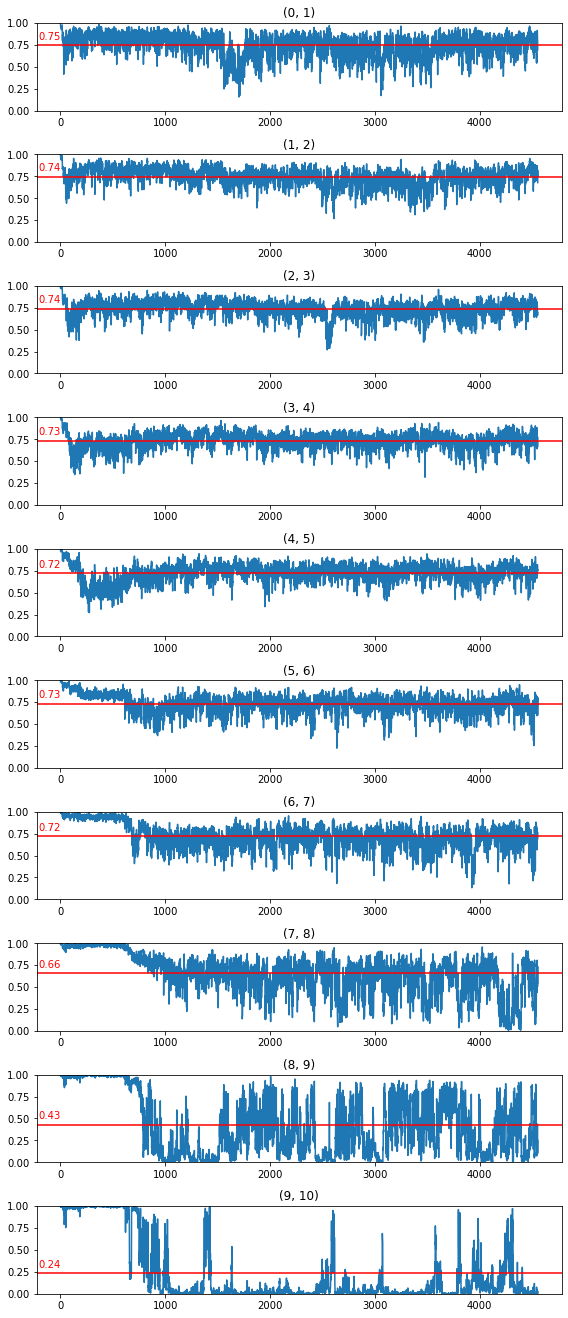

In [74]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(state_neighbors, acceptance_rates_all)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 0 across all iterations and plot

In [75]:
states = range(11)
states_0 = []
for first, second in zip([0]*11, states):
    states_0.append((first, second))

In [76]:
acceptance_rates_0 = []
for pair in tqdm.tqdm(states_0):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, last_iter):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_0.append(acceptance_rates)

100%|██████████| 11/11 [01:43<00:00,  9.40s/it]


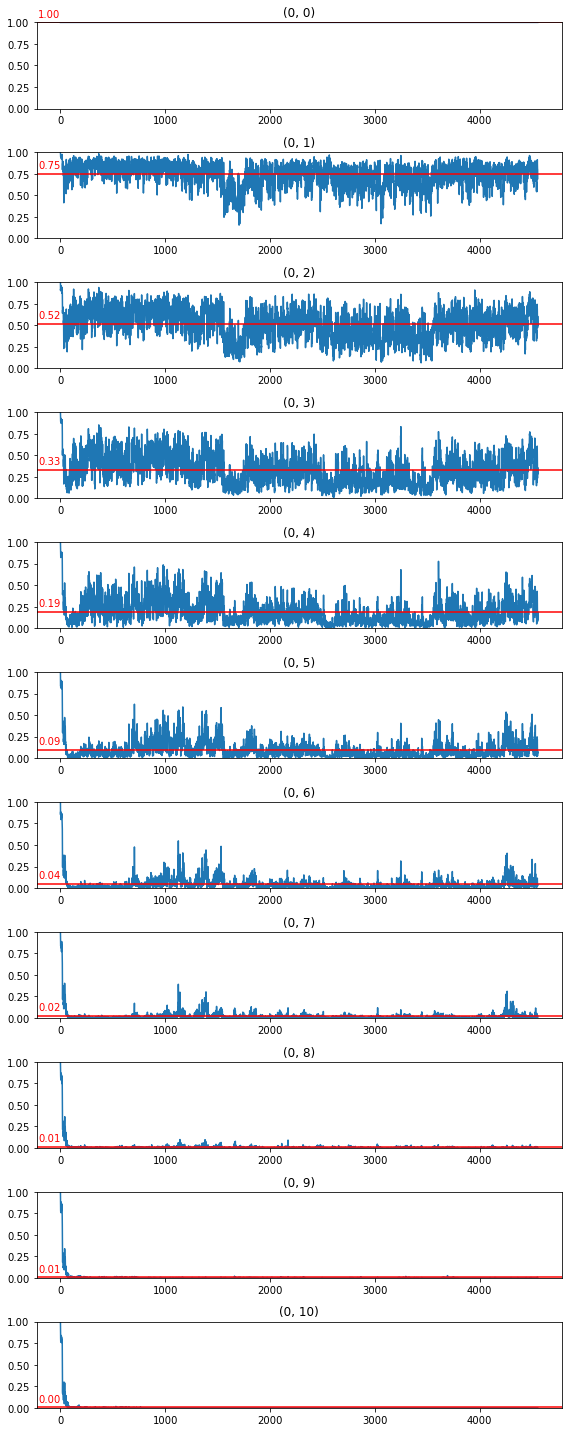

In [77]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_0, acceptance_rates_0)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

### Compute acceptance rates for pairs of states involving state = 10 across all iterations and plot

In [78]:
states = range(11)
states_10 = []
for first, second in zip([10]*11, states):
    states_10.append((first, second))

In [79]:
states_10

[(10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (10, 10)]

In [80]:
acceptance_rates_10 = []
for pair in tqdm.tqdm(states_10):
    state_i = pair[0]
    state_j = pair[1]
    acceptance_rates = []
    for iteration in range(1, last_iter):
        acceptance_rates.append(reporter.read_mixing_statistics(iteration)[0][state_i][state_j] / reporter.read_mixing_statistics(iteration)[1][state_i][state_j])
    acceptance_rates_10.append(acceptance_rates)

100%|██████████| 11/11 [01:39<00:00,  9.01s/it]


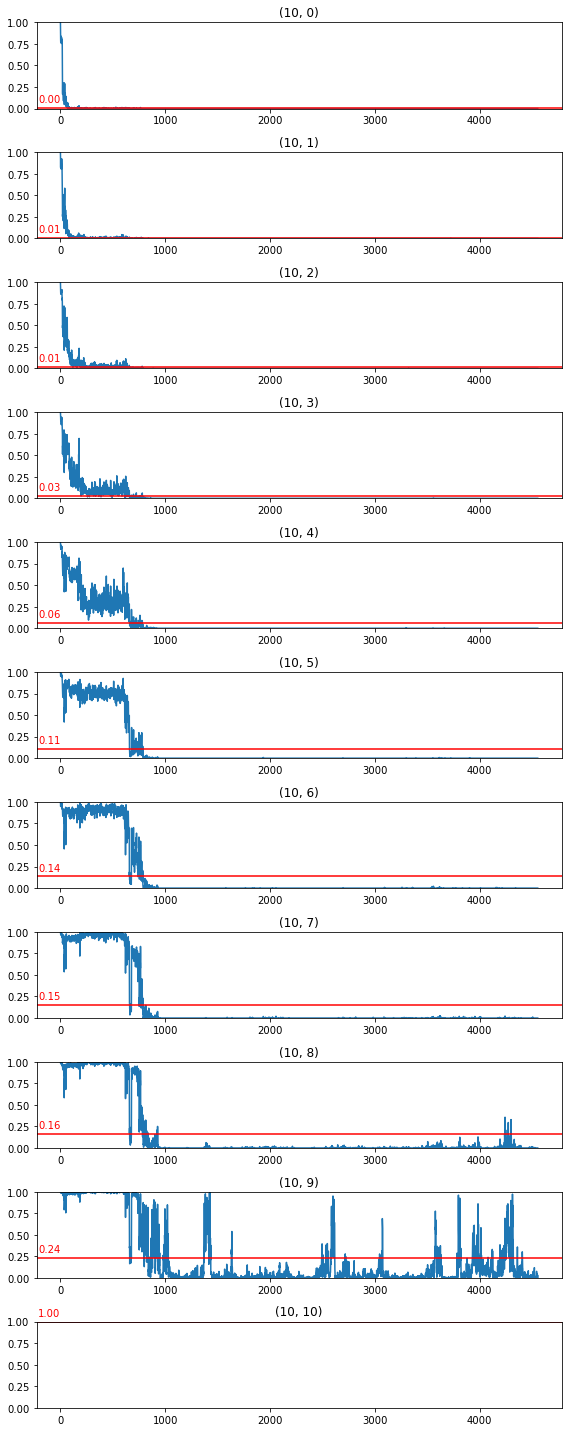

In [81]:
cols = 1
rows = 11
plt.figure(figsize=(8, 20))
gs = plt.GridSpec(rows, cols)
for i, (pair, acceptance_rates) in enumerate(zip(states_10, acceptance_rates_10)):
    plt.subplot(gs[i,0])
    plt.plot(acceptance_rates)
    plt.title(pair)
    plt.ylim([0, 1])
    mean = np.mean(acceptance_rates)
    plt.axhline(y=mean, color="red")

#     trans = transforms.blended_transform_factory(
#         plt.yticks()[0].get_transform(), plt.transData)
    plt.text(0, mean + 0.1, "{:.2f}".format(mean), color="red", 
            ha="right", va="center")
plt.tight_layout()
plt.show()

In [83]:
import math
from simtk import openmm, unit
T_min = 298.0 * unit.kelvin  # Minimum temperature.
T_max = 600.0 * unit.kelvin  # Maximum temperature.
temperatures = [T_min + (T_max - T_min) * (math.exp(float(i) / float(11-1)) - 1.0) / (math.e - 1.0)
                for i in range(11)]

In [84]:
temperatures

[Quantity(value=298.0, unit=kelvin),
 Quantity(value=316.48452141714694, unit=kelvin),
 Quantity(value=336.91307692192413, unit=kelvin),
 Quantity(value=359.4901223640981, unit=kelvin),
 Quantity(value=384.44161640286114, unit=kelvin),
 Quantity(value=412.01728197703994, unit=kelvin),
 Quantity(value=442.4931056162021, unit=kelvin),
 Quantity(value=476.17409960660655, unit=kelvin),
 Quantity(value=513.3973546566822, unit=kelvin),
 Quantity(value=554.5354136141382, unit=kelvin),
 Quantity(value=600.0, unit=kelvin)]